In [29]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [31]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [32]:
from citipy import citipy

In [33]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [34]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [35]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=1ba809f84a2edb2f0ac3f3f43124f13b


In [36]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [37]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | raudeberg
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | santo tomas
Processing Record 4 of Set 1 | meadow lake
Processing Record 5 of Set 1 | chuy
Processing Record 6 of Set 1 | cherskiy
Processing Record 7 of Set 1 | kahului
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | hithadhoo
Processing Record 10 of Set 1 | amderma
City not found. Skipping...
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | bluff
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | iracoubo
Processing Record 15 of Set 1 | vao
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | atuona
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | mar del plata
Processing Record 23 o

Processing Record 40 of Set 4 | matara
Processing Record 41 of Set 4 | mzimba
Processing Record 42 of Set 4 | road town
Processing Record 43 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 44 of Set 4 | envira
Processing Record 45 of Set 4 | manoel urbano
Processing Record 46 of Set 4 | babanusah
City not found. Skipping...
Processing Record 47 of Set 4 | dauphin
Processing Record 48 of Set 4 | zyryanovsk
Processing Record 49 of Set 4 | tiksi
Processing Record 50 of Set 4 | hegang
Processing Record 1 of Set 5 | avarua
Processing Record 2 of Set 5 | takoradi
Processing Record 3 of Set 5 | abiramam
Processing Record 4 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 5 of Set 5 | jamestown
Processing Record 6 of Set 5 | nicoya
Processing Record 7 of Set 5 | dolbeau
City not found. Skipping...
Processing Record 8 of Set 5 | coihaique
Processing Record 9 of Set 5 | hauterive
Processing Record 10 of Set 5 | napasar
Processing Record 11 of Set 

City not found. Skipping...
Processing Record 31 of Set 8 | xiongyue
Processing Record 32 of Set 8 | pochutla
Processing Record 33 of Set 8 | mount isa
Processing Record 34 of Set 8 | daru
Processing Record 35 of Set 8 | hokitika
Processing Record 36 of Set 8 | jiroft
City not found. Skipping...
Processing Record 37 of Set 8 | angoche
Processing Record 38 of Set 8 | dire
Processing Record 39 of Set 8 | changji
Processing Record 40 of Set 8 | waseca
Processing Record 41 of Set 8 | bantacan
Processing Record 42 of Set 8 | kuybysheve
Processing Record 43 of Set 8 | roma
Processing Record 44 of Set 8 | norman wells
Processing Record 45 of Set 8 | ayan
Processing Record 46 of Set 8 | soe
Processing Record 47 of Set 8 | ipixuna
Processing Record 48 of Set 8 | dawei
Processing Record 49 of Set 8 | candolim
Processing Record 50 of Set 8 | sohag
Processing Record 1 of Set 9 | rocky mountain house
Processing Record 2 of Set 9 | xuddur
Processing Record 3 of Set 9 | bonthe
Processing Record 4 of 

Processing Record 20 of Set 12 | vestmannaeyjar
Processing Record 21 of Set 12 | arlit
Processing Record 22 of Set 12 | lodja
Processing Record 23 of Set 12 | sitka
Processing Record 24 of Set 12 | kahama
Processing Record 25 of Set 12 | lai
Processing Record 26 of Set 12 | keti bandar
Processing Record 27 of Set 12 | chimbote
Processing Record 28 of Set 12 | the valley
Processing Record 29 of Set 12 | galesong
Processing Record 30 of Set 12 | coos bay
Processing Record 31 of Set 12 | pauini
Processing Record 32 of Set 12 | san policarpo
Processing Record 33 of Set 12 | kushima
Processing Record 34 of Set 12 | jalingo
Processing Record 35 of Set 12 | quibor
Processing Record 36 of Set 12 | mocambique
City not found. Skipping...
Processing Record 37 of Set 12 | myitkyina
Processing Record 38 of Set 12 | yining
Processing Record 39 of Set 12 | paris
Processing Record 40 of Set 12 | toora-khem
Processing Record 41 of Set 12 | mpulungu
Processing Record 42 of Set 12 | petropavlovsk-kamchat

In [38]:
len(city_data)

589

In [39]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Raudeberg,61.9875,5.1352,37.00,93,90,10.36,NO,2021-01-23 20:55:34
1,Mataura,-46.1927,168.8643,57.00,81,99,7.00,NZ,2021-01-23 20:55:18
2,Santo Tomas,14.1079,121.1414,78.80,94,75,1.57,PH,2021-01-23 20:55:34
3,Meadow Lake,34.8014,-106.5436,57.99,37,75,12.66,US,2021-01-23 20:55:35
4,Chuy,-33.6971,-53.4616,77.72,72,1,12.12,UY,2021-01-23 20:55:35
5,Cherskiy,68.7500,161.3000,-24.34,86,100,5.46,RU,2021-01-23 20:55:35
6,Kahului,20.8947,-156.4700,77.00,65,40,18.41,US,2021-01-23 20:52:10
7,Albany,42.6001,-73.9662,23.00,43,0,4.00,US,2021-01-23 20:55:35
8,Hithadhoo,-0.6000,73.0833,81.84,70,100,4.61,MV,2021-01-23 20:55:35
9,Rikitea,-23.1203,-134.9692,78.89,66,0,9.95,PF,2021-01-23 20:55:36


In [40]:
# Rearrange column orders in dataframe.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Raudeberg,NO,2021-01-23 20:55:34,61.9875,5.1352,37.00,93,90,10.36
1,Mataura,NZ,2021-01-23 20:55:18,-46.1927,168.8643,57.00,81,99,7.00
2,Santo Tomas,PH,2021-01-23 20:55:34,14.1079,121.1414,78.80,94,75,1.57
3,Meadow Lake,US,2021-01-23 20:55:35,34.8014,-106.5436,57.99,37,75,12.66
4,Chuy,UY,2021-01-23 20:55:35,-33.6971,-53.4616,77.72,72,1,12.12


In [41]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [42]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

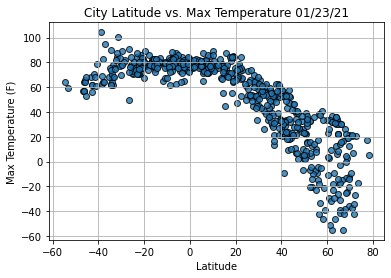

In [43]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

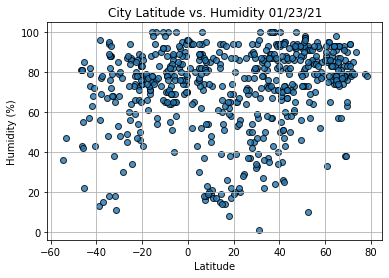

In [44]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

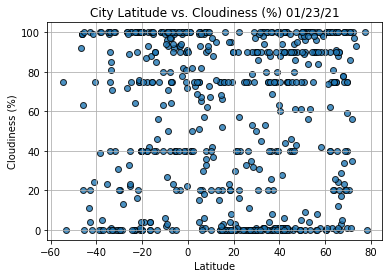

In [45]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

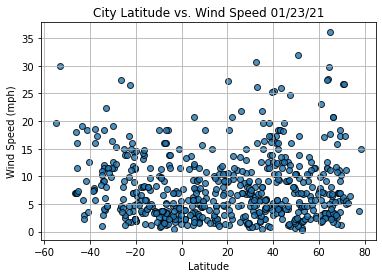

In [46]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [93]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [49]:
index13 = city_data_df.loc[13]
index13

City                          Vao
Country                        NC
Date          2021-01-23 20:52:27
Lat                      -22.6667
Lng                       167.483
Max Temp                    76.33
Humidity                       80
Cloudiness                    100
Wind Speed                  26.46
Name: 13, dtype: object

In [52]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Raudeberg,NO,2021-01-23 20:55:34,61.9875,5.1352,37.00,93,90,10.36
2,Santo Tomas,PH,2021-01-23 20:55:34,14.1079,121.1414,78.80,94,75,1.57
3,Meadow Lake,US,2021-01-23 20:55:35,34.8014,-106.5436,57.99,37,75,12.66
5,Cherskiy,RU,2021-01-23 20:55:35,68.7500,161.3000,-24.34,86,100,5.46
6,Kahului,US,2021-01-23 20:52:10,20.8947,-156.4700,77.00,65,40,18.41


In [53]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

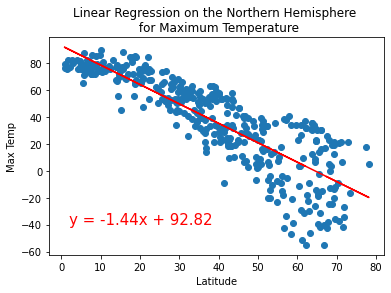

In [96]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(2,-40))

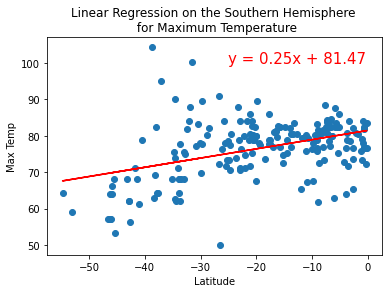

In [99]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-25,100))

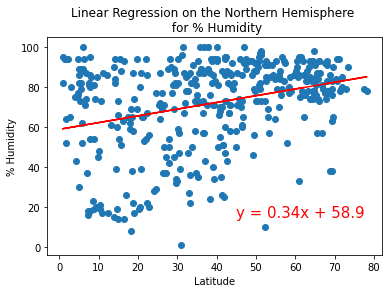

In [105]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(45,15))

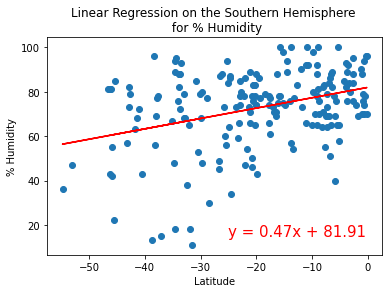

In [107]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,15))

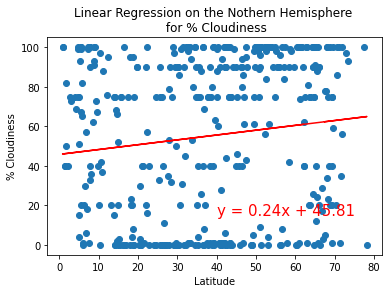

In [108]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Nothern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,15))

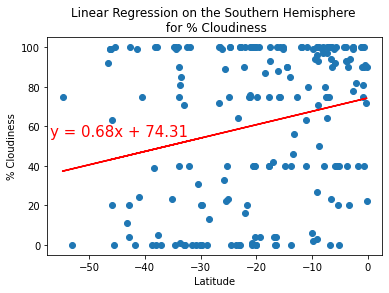

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-57,55))

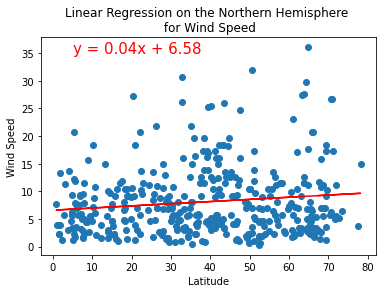

In [117]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,35))

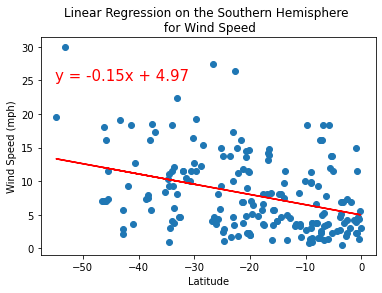

In [124]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed (mph)',(-55,25))